In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from process_met_data import ProcData
from process_pathways import ProcessPathways
import methods
from simulate_met_data import SimulateDataset, SimulateDatasetNamed
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

In [2]:
goldman_data = ProcData("Goldman")
goldman_data.process_goldman(id_type="CHEBI")
goldman_proc_orig = goldman_data.data_proc

# Load Reactome pathway dictionary
R76 = ProcessPathways("R76", "ChEBI2Reactome_All_Levels.txt", "Homo sapiens")
pathway_dict, pathway_names = R76.process_reactome()

# Remove large and uninformative pathways
# TODO Remove large and uninformative pathways
remove_paths = ["R-HSA-1430728", "R-HSA-1643685", "R-HSA-382551"]
pathway_dict = {k: v for k, v in pathway_dict.items() if k not in remove_paths}

# Remove pathways not present in the dataset
compounds_present = goldman_proc_orig.columns.tolist()
pathways_present = {k: v for k, v in pathway_dict.items() if len([i for i in compounds_present if i in v]) > 1}
print(len(pathways_present))

255


In [3]:
goldman_sim = SimulateDatasetNamed(goldman_data.data_proc.iloc[:, :-2],
                                  goldman_data.data_proc["Group"],
                                   "COVID19 ",
                                  pathways_present, 2, upreg_paths=["R-HSA-1483257", "R-HSA-1614635", "R-HSA-194068"])
g_sim = goldman_sim.generate_data()
upreg_paths = goldman_sim.upreg_paths_id
downreg_paths = goldman_sim.downreg_paths_id
sims_dict = {}
for i in upreg_paths + downreg_paths:
    if i in upreg_paths:
        sims_dict[i] = "upreg"
    else:
        sims_dict[i] = "downreg"

In [11]:
g_sim

,1372,16610,72665,27823,30915,37373,16831,545959,17050,16359,...,133677,133693,133694,28036,28238,76341,89312,17861,89188,Group
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-0.822470,0.370169,0.537246,0.362243,-0.578361,-1.201938,-1.195697,-0.253528,0.237192,0.371898,...,0.125720,0.057068,0.228500,-0.546769,-0.587946,-0.175542,-0.693254,-1.201150,0.403074,COVID19
1008097,0.149291,-0.802638,-1.220563,-0.774417,-0.123663,-0.453530,-0.956306,-0.805678,-0.840364,0.973060,...,0.741096,0.565895,0.544281,-0.053133,-0.048306,-0.920090,-1.434730,-0.475391,0.134784,COVID19
1008631,1.012771,-1.033291,0.145690,0.524050,-0.073503,-0.229649,1.475643,-0.437623,-0.827898,-1.060236,...,0.529527,0.507601,1.009191,0.099614,0.508498,-1.272854,0.448616,1.207374,-0.637957,Healthy Donor
1012545,-0.979554,-0.395854,2.449097,0.866752,-0.354040,-0.345205,0.057663,-0.306422,-0.908367,-1.112209,...,-0.288374,-0.091666,0.782065,-0.341433,1.612615,0.851680,-0.504009,0.084370,-0.279907,Healthy Donor
1022407,-0.739817,-0.288710,-0.782552,-0.526128,0.288048,0.550284,-0.550971,-0.640346,-0.833565,-1.051755,...,0.594955,0.233939,0.883763,-0.576132,-0.567979,-1.182109,-0.260231,-1.009292,-0.095161,Healthy Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,-2.228940,-0.101002,-0.679609,0.000163,0.284214,0.734004,-0.041038,-0.210435,0.070459,-0.995485,...,-0.485733,-0.525115,-0.495566,-0.182214,0.714288,-0.265526,-0.151931,1.330576,-1.105986,Healthy Donor
INCOV136-BL,-0.169748,1.599117,0.173275,0.046243,-0.470655,1.219268,0.504222,1.204577,2.016911,-0.406825,...,-0.633350,-0.768909,-0.829643,-0.247622,-1.579635,0.567450,-0.364475,1.220314,-0.755291,Healthy Donor
INCOV137-BL,0.317113,0.383352,-0.981562,0.857227,-1.462299,0.594609,0.561018,-0.709397,0.361510,-1.124700,...,-1.539176,-1.380566,-1.338709,2.431694,0.961980,0.630608,-0.262134,0.475143,-1.235598,Healthy Donor


In [4]:
def cluster_ttest(mat, pathways):
#     mat.loc[:, :-1] = StandardScaler().fit_transform(mat.iloc[:, :-1].to_numpy())
    pathway_matrices = []
    pathway_ids = []
    for pathway, compounds in pathways.items():
        single_pathway_matrix = mat.drop(mat.columns.difference(compounds), axis=1)
        if single_pathway_matrix.shape[1] >= 1:
            pathway_matrices.append(single_pathway_matrix.values)
            pathway_ids.append(pathway)

    scores = []
    for m in pathway_matrices:
        kmeans = KMeans(n_clusters=2)
        new_data = kmeans.fit_transform(m)
        scores.append(new_data[:, 0])
    scores_df = pd.DataFrame(scores, columns=mat.index, index=pathways.keys())

    return scores_df


def clusterproj_ttest(mat, pathways):
#     mat.loc[:, :-1] = StandardScaler().fit_transform(mat.iloc[:, :-1].to_numpy())
    pathway_matrices = []
    pathway_ids = []
    for pathway, compounds in pathways.items():
        single_pathway_matrix = mat.drop(mat.columns.difference(compounds), axis=1)
        if single_pathway_matrix.shape[1] >= 1:
            pathway_matrices.append(single_pathway_matrix.values)
            pathway_ids.append(pathway)

    scores = []
    for m in pathway_matrices:
        kmeans = KMeans(n_clusters=2).fit(m)
        centroids1 = kmeans.cluster_centers_[0]
        centroids2 = kmeans.cluster_centers_[1]

        vec = centroids1 - centroids2
        unit_vec = vec / np.linalg.norm(vec)
        proj_data = unit_vec.dot(m.T)
        scores.append(proj_data)

    scores_df = pd.DataFrame(scores, columns=mat.index, index=pathways.keys())

    return scores_df

def kpca_res(mat, pathways):
#     mat.loc[:, :-1] = StandardScaler().fit_transform(mat.iloc[:, :-1].to_numpy())
    pathway_matrices = []
    pathway_ids = []
    for pathway, compounds in pathways.items():
        single_pathway_matrix = mat.drop(mat.columns.difference(compounds), axis=1)
        if single_pathway_matrix.shape[1] >= 1:
            pathway_matrices.append(single_pathway_matrix.values)
            pathway_ids.append(pathway)

    scores = []
    for n, m in enumerate(pathway_matrices):
        kpca = KernelPCA(n_components=2, kernel="rbf")
        new_data = kpca.fit_transform(m)
        scores.append(new_data[:, 0])
    scores_df = pd.DataFrame(scores, columns=mat.index, index=pathways.keys())

    return scores_df


# Score distributions for R-HSA-1614635

In [5]:
kpca_score = kpca_res(g_sim.iloc[:, :-1], pathways_present).T
cluster_score = cluster_ttest(g_sim.iloc[:, :-1], pathways_present).T
proj_score = clusterproj_ttest(g_sim.iloc[:, :-1], pathways_present).T

In [6]:
# standard scale scores

kpca_score.iloc[:, :] = StandardScaler().fit_transform(kpca_score) 
cluster_score.iloc[:, :] = StandardScaler().fit_transform(cluster_score) 
proj_score.iloc[:, :] = StandardScaler().fit_transform(proj_score) 


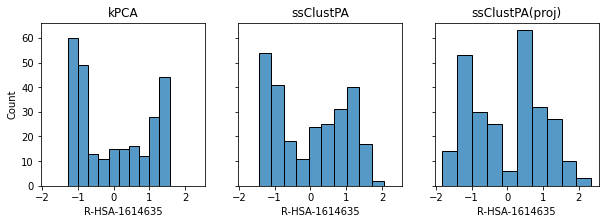

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
sns.histplot(kpca_score.loc[:, "R-HSA-1614635"], ax=ax1)
sns.histplot(cluster_score.loc[:, "R-HSA-1614635"], ax=ax2)
sns.histplot(proj_score.loc[:, "R-HSA-1614635"], ax=ax3)
ax1.set_title("kPCA")
ax2.set_title("ssClustPA")
ax3.set_title("ssClustPA(proj)")
plt.savefig("../figures/new_methods_score_distribution.png", dpi=350)
plt.show()

# Method diagrams

In [8]:
single_pathway_matrix = g_sim.iloc[:, :-1].drop(g_sim.iloc[:, :-1].columns.difference(pathways_present["R-HSA-1614635"]), axis=1)

In [45]:
single_pathway_matrix

,16680,17509,17482,16238,16668,30797,15891,30831,16335,17750,17724,16708
sample_id,,,,,,,,,,,,
1004596,0.644293,0.169526,0.555424,0.138469,0.265883,0.397967,0.204678,-0.146903,-0.043780,0.027556,0.610157,-0.202149
1008097,0.433631,0.416983,0.516715,-0.229709,0.088873,0.199422,0.113577,0.414144,0.474387,0.627755,0.883297,0.285703
1008631,-0.617554,-0.859225,-1.007725,-0.765116,-1.070468,-0.892487,-0.655665,-1.176524,-0.512611,-0.893637,-0.802511,-1.590594
1012545,-1.888020,-1.355120,-0.566061,-1.203106,-1.578889,-1.167702,-1.057022,-0.820615,-1.415858,-0.875668,-1.285453,0.068652
1022407,-0.964834,-1.107867,-1.062655,-1.275445,-1.272121,-0.800974,-0.826599,-0.150601,-1.150346,-0.481773,-0.907021,-0.971210
...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,-1.217659,-0.737110,-1.236520,-0.191183,-0.934640,-0.269130,-0.398574,-0.090982,-1.267190,-0.913937,-1.099024,-0.465019
INCOV136-BL,-0.482212,-0.340237,-1.097752,1.156301,1.475072,0.030335,0.935299,0.900458,-0.441306,-0.194449,0.750065,0.580944
INCOV137-BL,1.075620,0.662514,-0.578334,1.397020,-0.105896,-1.370840,0.659477,-0.479174,-0.163369,-0.714199,-0.594932,-0.404425


In [9]:
# Get data for ssclust pa/ssclustpaproj plot
kmeans = KMeans(n_clusters=2)
new_data = kmeans.fit_transform(single_pathway_matrix)
ssclustpa_scores = new_data[:, 0]
ssclustpa_centroids = kmeans.cluster_centers_
print(ssclustpa_centroids)

# ssclustpaproj points and projected centroids
centroids1 = kmeans.cluster_centers_[0]
centroids2 = kmeans.cluster_centers_[1]
vec = centroids1 - centroids2
unit_vec = vec / np.linalg.norm(vec)
proj_data = unit_vec.dot(single_pathway_matrix.T)

print(proj_data.shape)

# Get data for kPCA
kpca = KernelPCA(n_components=2, kernel="rbf")
kpca_dat = kpca.fit_transform(single_pathway_matrix)


[[ 0.66555746  0.67685909  0.69013606  0.68541364  0.66178006  0.7103377
   0.64462383  0.64531235  0.66808783  0.66624315  0.6785455   0.62409969]
 [-0.73477543 -0.74725243 -0.76191021 -0.75669666 -0.73060519 -0.78421283
  -0.71166471 -0.71242484 -0.73756896 -0.73553244 -0.74911423 -0.68900606]]
(263,)


In [11]:
import patchworklib as pw

<Figure size 72x72 with 0 Axes>

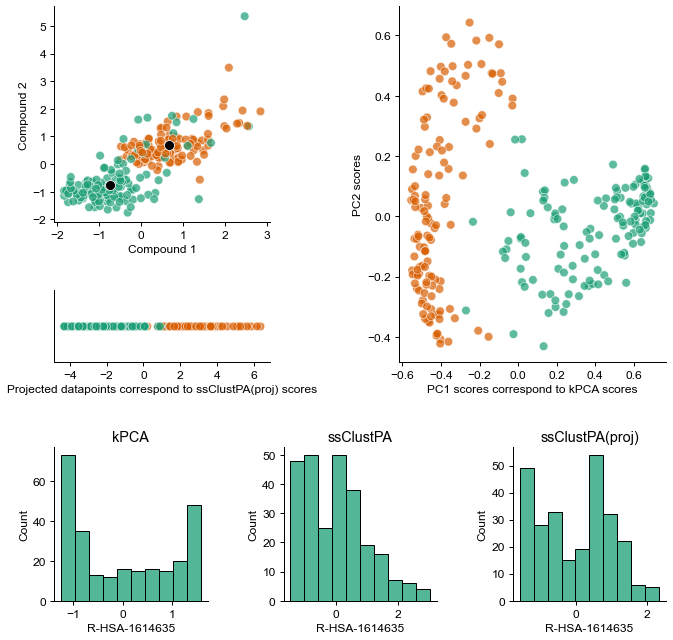

In [17]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
sns.set_palette("Dark2")
ax1 = pw.Brick(figsize=(3,3))
ax2 = pw.Brick(figsize=(3,1))
ax3 = pw.Brick(figsize=(3,4))

sns.scatterplot(x=single_pathway_matrix.iloc[:, 0], y=single_pathway_matrix.iloc[:, 1], hue=g_sim["Group"], ax=ax1, legend = False, s=75, alpha=0.7)
sns.scatterplot(x=ssclustpa_centroids[:, 0], y=ssclustpa_centroids[:, 1], color="k", ax=ax1, s=100, legend = False)
sns.scatterplot(x=proj_data, y=[0 for i in range(0, len(proj_data))], hue=g_sim["Group"], ax=ax2, legend = False, s=75, alpha=0.7)
sns.scatterplot(x=kpca_dat[:, 0], y=kpca_dat[:, 1], ax=ax3, hue=g_sim["Group"], legend = False, s=75, alpha=0.7)

ax1.set_xlabel("Compound 1")
ax1.set_ylabel("Compound 2")
ax2.set_ylim(-0.1, 0.1)
ax2.axes.yaxis.set_visible(False)
# ax3.axes.yaxis.set_visible(False)
ax2.set_xlabel("Projected datapoints correspond to ssClustPA(proj) scores")
ax3.set_xlabel("PC1 scores correspond to kPCA scores")
ax3.set_ylabel("PC2 scores")


ax4 = pw.Brick(figsize=(2,2))
ax5 = pw.Brick(figsize=(2,2))
ax6 = pw.Brick(figsize=(2,2))

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
sns.histplot(kpca_score.loc[:, "R-HSA-1614635"], ax=ax4)
sns.histplot(cluster_score.loc[:, "R-HSA-1614635"], ax=ax5)
sns.histplot(proj_score.loc[:, "R-HSA-1614635"], ax=ax6)
ax4.set_title("kPCA")
ax5.set_title("ssClustPA")
ax6.set_title("ssClustPA(proj)")
# plt.savefig("../figures/new_methods_score_distribution.png", dpi=350)
# plt.show()

ax12 = (ax1/ax2|ax3)/(ax4|ax5|ax6)
sns.despine(ax=ax1)
sns.despine(ax=ax2)
sns.despine(ax=ax3)
sns.despine(ax=ax4)
sns.despine(ax=ax5)
sns.despine(ax=ax6)
ax12.savefig("../figures/novel_methods_diagram2.svg", dpi=350)
